# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04).
binutils set to manually installed.
dpkg-dev is already the newest version (1.19.0.5ubuntu2.1).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
g++ set to manually installed.
gcc is already the newest version (4:7.3.0-3ubuntu2.1).
gcc set to manually installed.
gfortran is already the newest version (4:7.3.0-3ubuntu2.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.1).
libx11-dev set to manually installed.
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:


### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb    TrimmedTree.root
BasicPyROOTExample.ipynb  root_build_google_yikes.tar  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Team\ Drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
drwxr-xr-x  1 root root 4.0K Feb 19 17:17 sample_data
drwx------  4 root root 4.0K Feb 27 00:13 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
import ROOT
import numpy as np

Welcome to JupyROOT 6.14/04


In [0]:
from array import array

In [0]:
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )

In [0]:
x = array( 'f', [ 0 ] )
y = array( 'f', [ 0 ] )
z = array( 'f', [ 0 ] )


In [11]:
MyTree.Branch( 'X', x, 'X/F' )
MyTree.Branch( 'Y', y, 'Y/F' )
MyTree.Branch( 'Z', z, 'Z/F' )

<ROOT.TBranch object ("Z") at 0x75a8f00>

In [0]:
from random import randint

In [0]:
for i in range(10000):
  x[0] = round(np.random.normal(5.0,1.0))
  y[0] = round(np.random.normal(5.0,0.8))
  z[0] = 10*(np.random.rand())
  MyTree.Fill()

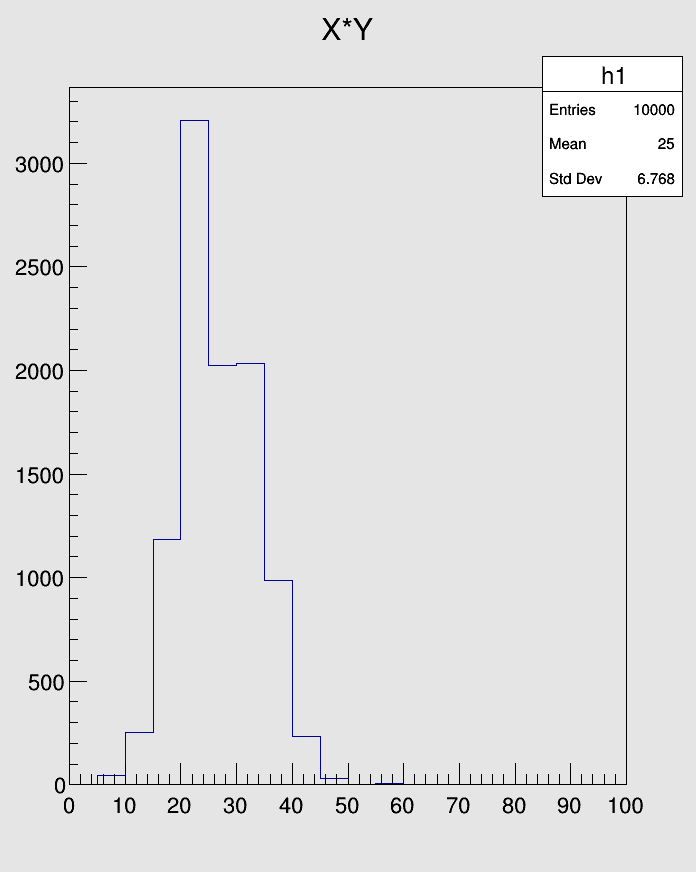

In [14]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw(" X*Y >>h1(20,0,100)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

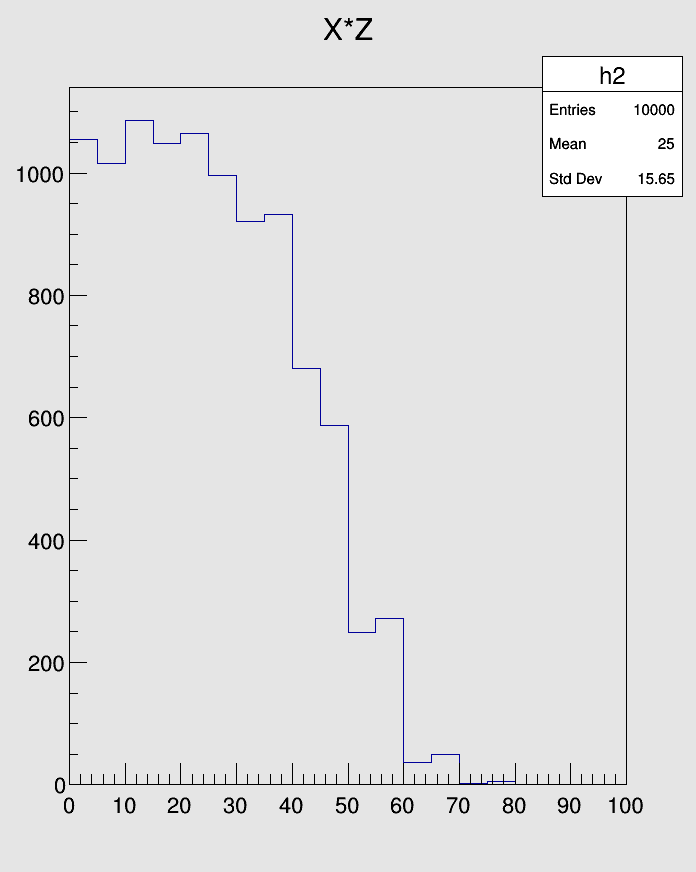

In [15]:
MyTree.Draw("X*Z>>h2(20,0,100)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

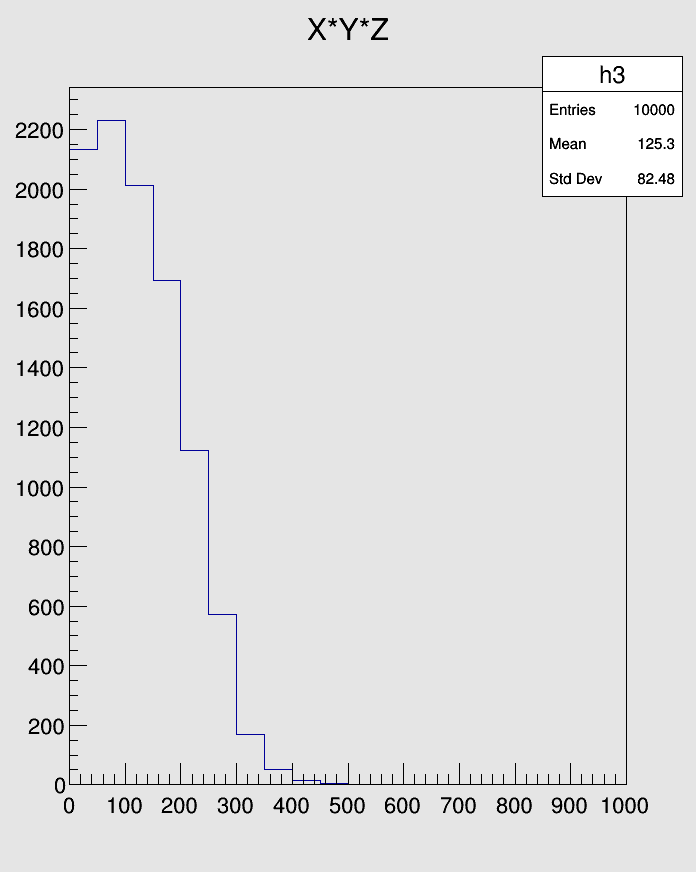

In [16]:
MyTree.Draw("X*Y*Z>>h3(20,0,1000)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

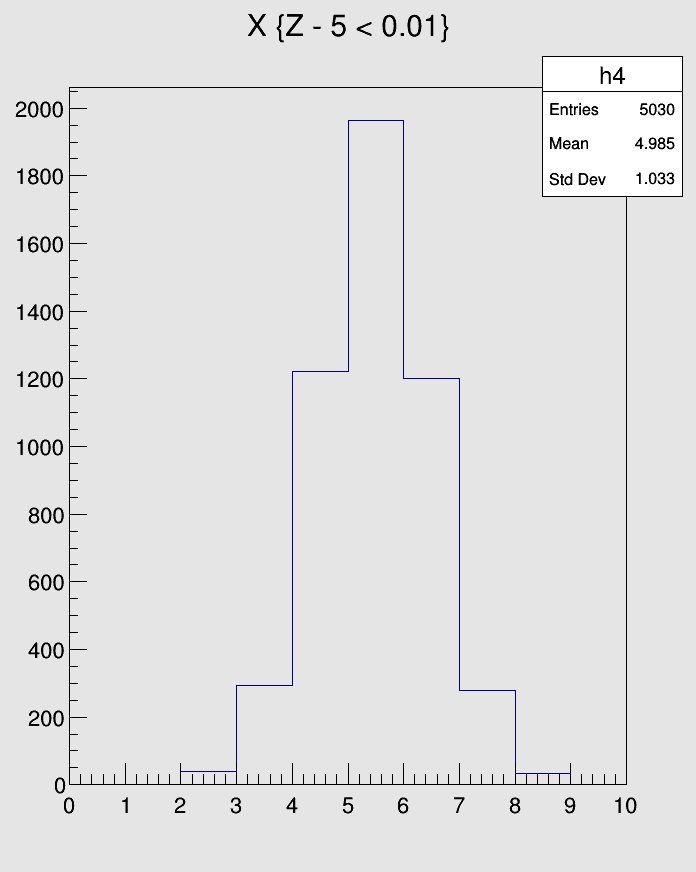

In [17]:
MyTree.Draw("X>>h4(10,0,10)","Z - 5 < 0.01")
c1.Update()
gROOT.GetListOfCanvases().Draw()

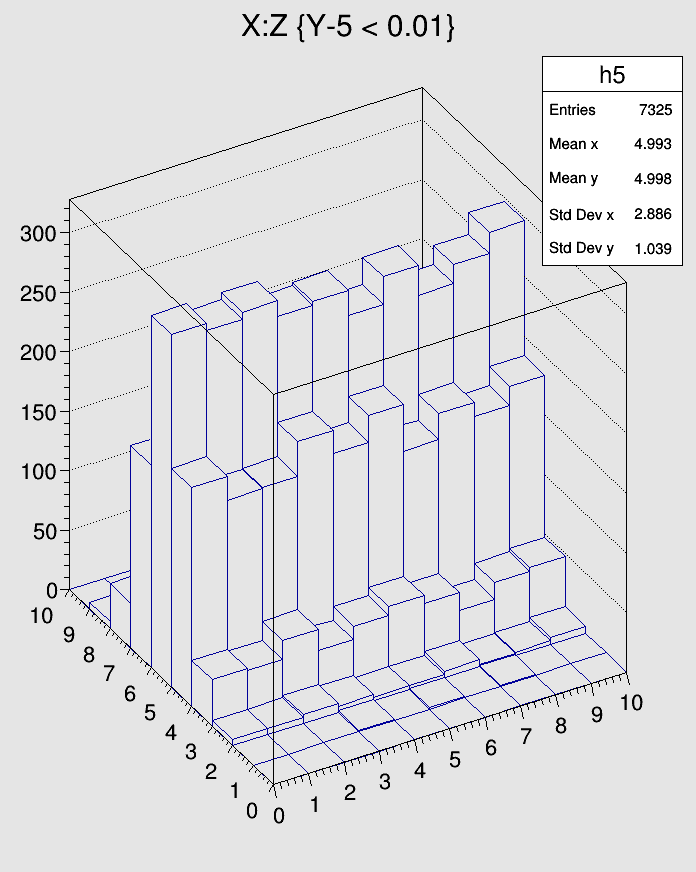

In [21]:
MyTree.Draw("X:Z>>h5(10,0,10,10,0,10)","Y-5 < 0.01", "lego")
c1.Update()
gROOT.GetListOfCanvases().Draw()

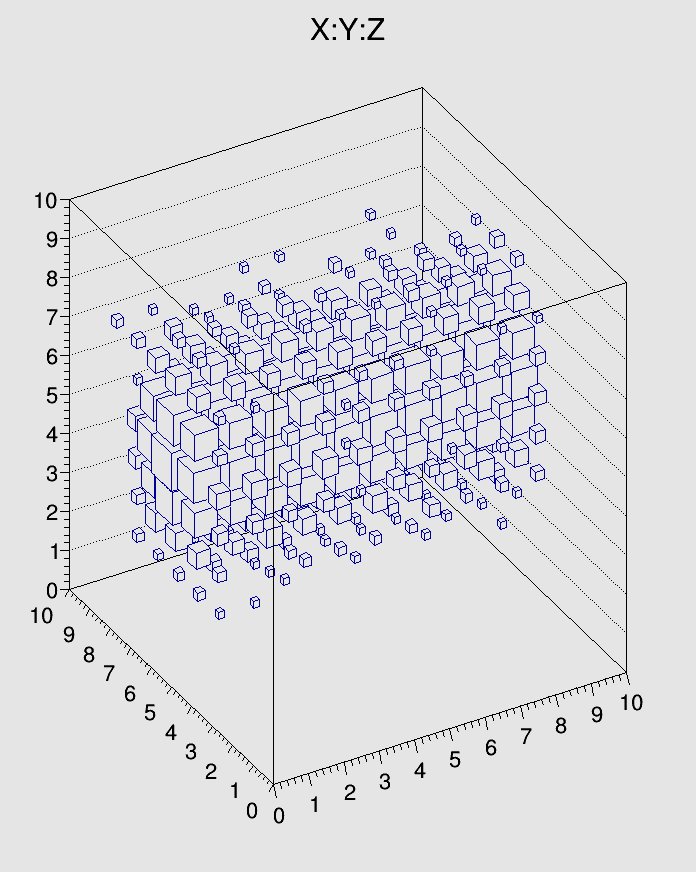

In [19]:
MyTree.Draw("X:Y:Z>>h6(10,0,10,10,0,10,10,0,10)","", "lego")
c1.Update()
gROOT.GetListOfCanvases().Draw()